# CSD calculation experiments

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Euler_1stOrderForward import getEulerBOLD
from signal_pytorch import csd
import torch
import scipy


#model.sigma, model.mu, model.lamb, model.beta, model.phi, model.psi, model.chi
# 0.51146787, 0.09446296, 0.49276760, 0.74628520, 0.87910885, 0.42740121, 0.86071467

observed_bold = np.loadtxt('/rds/general/user/ak1920/home/fyp/fyp/time_series/sub-001-PLCB-ROI52.txt' , delimiter=',')
observed_bold = torch.from_numpy(observed_bold)

f2, csdy = csd(observed_bold, observed_bold, fs=0.5, noverlap=None,  window='hamming', scaling='density', nfft=4096, nperseg=200, return_onesided=True)
observed_sum = torch.sum(csdy)
csdy = csdy / observed_sum

_, final_y = getEulerBOLD(sigma=0.5, mu=0.4, lamb=0.2, beta=10, phi=0.87910885, psi=0.42740121, chi=0.86071467, noise=True, length=1000)
final_y = torch.stack(final_y)
f, csdx = csd(final_y.detach().numpy(), final_y.detach().numpy(), fs=100, noverlap=None,  window='hamming', scaling='density', nfft=4096, return_onesided=True)
final_sum = torch.sum(csdx)
csdx = csdx / final_sum
print(observed_sum, final_sum)

plt.plot(np.arange(len(observed_bold)), observed_bold, label="observed")
plt.show()
plt.plot(np.arange(len(final_y)), final_y.detach().numpy(), label="simulated")
plt.legend()
plt.show()


plt.plot(f2, torch.sqrt(csdy.real ** 2 + csdy.imag ** 2).detach().numpy(), label='ground truth CSD')
plt.xlim(0, 0.1)
plt.show()
plt.xlim(0, 0.5)
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Euler_1stOrderForward import getEulerBOLD
from signal_pytorch import csd
import torch
import scipy
_, final_y = getEulerBOLD(sigma=0.1, mu=0.1, lamb=0.1, beta=1, phi=20, psi=20, chi=20, noise=True, length=1000)
final_y = torch.stack(final_y)
plt.plot(np.arange(len(final_y)), final_y.detach().numpy(), label="simulated")
plt.legend()
plt.show()

Input data is complex, switching to return_onesided=False
Input data is complex, switching to return_onesided=False
Input data is complex, switching to return_onesided=False
Input data is complex, switching to return_onesided=False


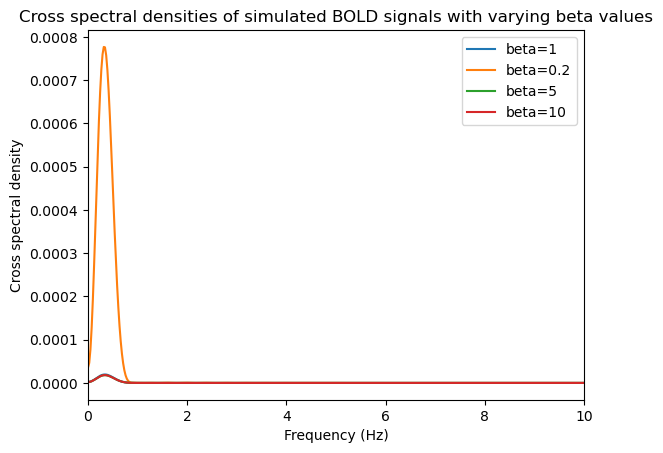

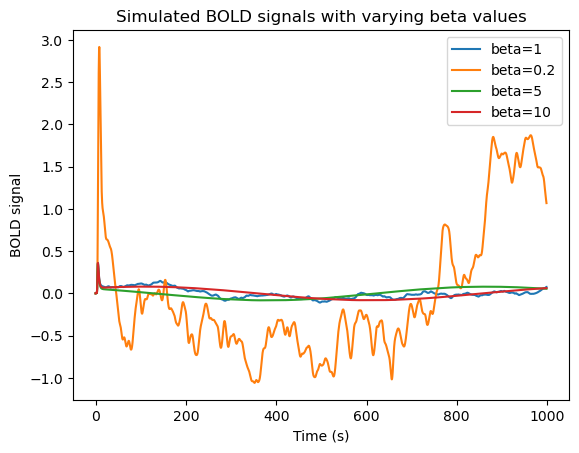

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from Euler_1stOrderForward import getEulerBOLD
from signal_pytorch import csd
import torch
import scipy

t0, final_y_0 = getEulerBOLD(sigma=2, mu=2, lamb=2, beta=1, phi=2, psi=2, chi=2, noise=True, length=1000)
final_y_0 = torch.stack(final_y_0)
f, csdx = csd(final_y_0.detach().numpy(), final_y_0.detach().numpy(), fs=100, noverlap=None,  window='hamming', scaling='density', nfft=4096, return_onesided=True)
plt.plot(torch.fft.fftshift(f), torch.fft.fftshift(csdx), label="beta=1")


t1, final_y_1 = getEulerBOLD(sigma=0.4, mu=1.0, lamb=0.4, beta=1.0, phi=0.4, psi=0.4, chi=0.4, noise=True, length=1000)
final_y_1 = torch.stack(final_y_1)
f, csdx1 = csd(final_y_1.detach().numpy(), final_y_1.detach().numpy(), fs=100, noverlap=None,  window='hamming', scaling='density', nfft=4096, return_onesided=True)
plt.plot(torch.fft.fftshift(f), torch.fft.fftshift(csdx1), label="beta=0.2")

t2, final_y_2 = getEulerBOLD(sigma=2, mu=2, lamb=2, beta=5, phi=2, psi=2, chi=2, noise=True, length=1000)
final_y_2 = torch.stack(final_y_2)
f, csdx2 = csd(final_y_2.detach().numpy(), final_y_2.detach().numpy(), fs=100, noverlap=None,  window='hamming', scaling='density', nfft=4096, return_onesided=True)
plt.plot(torch.fft.fftshift(f), torch.fft.fftshift(csdx2), label="beta=5")


t3, final_y_3 = getEulerBOLD(sigma=2, mu=2, lamb=2, beta=10, phi=2, psi=2, chi=2, noise=True, length=1000)
final_y_3 = torch.stack(final_y_3)
f, csdx3 = csd(final_y_3.detach().numpy(), final_y_3.detach().numpy(), fs=100, noverlap=None,  window='hamming', scaling='density', nfft=4096, return_onesided=True)
plt.plot(torch.fft.fftshift(f), torch.fft.fftshift(csdx3), label="beta=10")

plt.xlim(0, 10)

plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Cross spectral density")
plt.title("Cross spectral densities of simulated BOLD signals with varying beta values")

plt.show()

plt.plot(t0.detach().numpy(), final_y_0.detach().numpy(), label="beta=1")
plt.plot(t1.detach().numpy(), final_y_1.detach().numpy(), label="beta=0.2")
plt.plot(t2.detach().numpy(), final_y_2.detach().numpy(), label="beta=5")
plt.plot(t3.detach().numpy(), final_y_3.detach().numpy(), label="beta=10")

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("BOLD signal")
plt.title("Simulated BOLD signals with varying beta values")
plt.show()

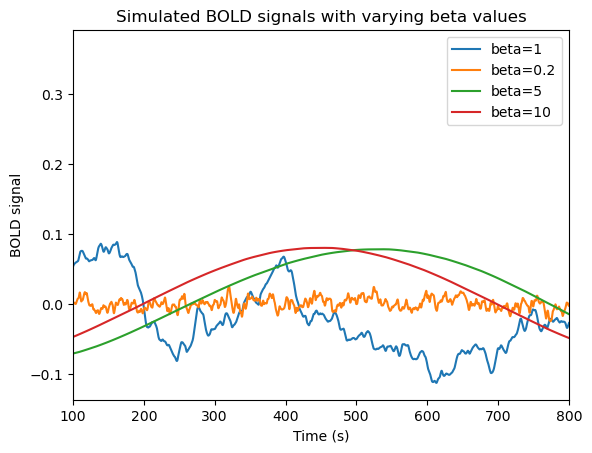

In [4]:
plt.plot(t0.detach().numpy(), final_y_0.detach().numpy(), label="beta=1")
plt.plot(t1.detach().numpy(), final_y_1.detach().numpy(), label="beta=0.2")
plt.plot(t2.detach().numpy(), final_y_2.detach().numpy(), label="beta=5")
plt.plot(t3.detach().numpy(), final_y_3.detach().numpy(), label="beta=10")

plt.xlim(100, 800)
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("BOLD signal")
plt.title("Simulated BOLD signals with varying beta values")
plt.show()

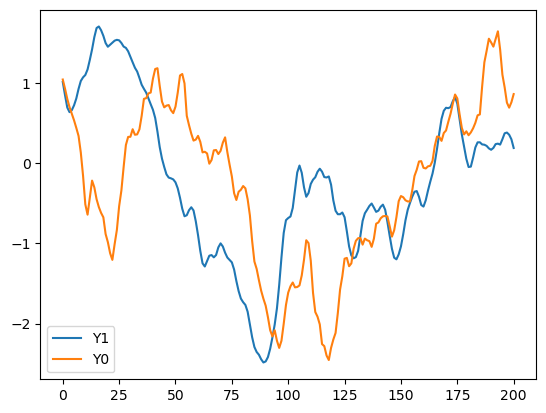

In [53]:
y1 = final_y_1[10000:]
y0 = final_y_0[10000:]
y2 = final_y_2[10000:]
y1 = y1/y1.std()
y0 = y0/y0.std()
y2 = y2/y2.std()
yd = y0
plt.plot(y1.detach()[::200][-217:], label='Y1')
plt.plot(y0.detach()[::200][-217:], label='Y0')
plt.legend()

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter

# Design a low-pass filter
fs = 100  # Define your sampling frequency here
nyq = 0.5 * fs
cutoff = 0.25  # cutoff frequency in Hz
order = 5
b, a = butter(order, cutoff / nyq, btype='low')

# Convert filter coefficients to PyTorch tensors
b = torch.tensor(b, dtype=torch.float32)
a = torch.tensor(a, dtype=torch.float32)

# Apply the filter using custom filtering function to keep gradients
def apply_filter(y, b, a):
    y_filtered = F.conv1d(y.view(1, 1, -1), b.view(1, 1, -1), padding=len(b) - 1)  # Convolution with padding
    y_filtered = y_filtered.view(-1)  # Flatten the result
    return y_filtered

# Apply the filter (note: this is a simplified approximation of filtfilt, true filtfilt would require forward and backward filtering)
filtered_signal_0 = apply_filter(y0, b, a)
filtered_signal_1 = apply_filter(y1, b, a)

# Downsample by a factor of 200 using custom downsampling function to keep gradients
def downsample(y, factor):
    return y[::factor]

# Downsample the filtered signals
downsampled_signal_0 = downsample(filtered_signal_0, 200)
downsampled_signal_1 = downsample(filtered_signal_1, 200)

# New sampling rate
new_fs = fs / 200

print("Downsampled signal length:", len(downsampled_signal_0))
print("Original sampling rate:", fs)
print("New sampling rate:", new_fs)

# Plotting
plt.plot(downsampled_signal_0.detach().numpy(), label='downsampled y0')
plt.plot(downsampled_signal_1.detach().numpy(), label='downsampled y1')
plt.legend()
plt.show()

In [20]:
observed_bold = np.loadtxt('/rds/general/user/ak1920/home/fyp/fyp/time_series/sub-001-PLCB-ROI5.txt' , delimiter=',')
observed_bold = torch.from_numpy(observed_bold)
observed_bold = observed_bold / observed_bold.std()

Input data is complex, switching to return_onesided=False


(0.0, 0.1)

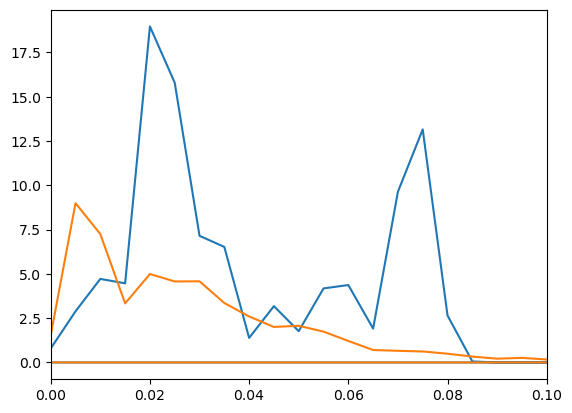

In [12]:
roi = 4
exp = "LSD"
observed_bold = np.loadtxt(f'/rds/general/user/ak1920/home/fyp/fyp/time_series/sub-002-{exp}-ROI{roi}.txt' , delimiter=',')
observed_bold = torch.from_numpy(observed_bold)

observed_bold = observed_bold / observed_bold.std()
f2, csdy = csd(observed_bold, observed_bold, fs=0.5, nperseg = 100)

# _, y= getEulerBOLD(noise=True, length=1000)
# f1, _ = csd(y, y, fs=100, nperseg = 20000)

csdx = np.loadtxt(f"final_spectrum_take_2_sub-001-{exp}-ROI{roi}.txt", delimiter=',', dtype=complex)


plt.plot(f2.detach(), csdy.detach())
plt.plot(f1.detach(), csdx)
plt.xlim(0, 0.1)
